In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANKModel import HANKModelClass

In [2]:
model = HANKModelClass(name='baseline')

In [3]:
model.info()

settings:
 par.py_hh = False
 par.py_block = True
 par.full_z_trans = False
 par.T = 500

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [w,r,d,tau]
 inputs_hh_z: []
 outputs_hh: [a,c,ell,n]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: [Z,istar,G]
 unknowns: [Y,w,pi]
 targets: [NKPC_res,clearing_N,clearing_A]

blocks (inputs -> outputs):
 production: [Z,w,Y] -> [N,s]
 taylor: [istar,pi,Y] -> [i]
 fisher: [i,pi] -> [r]
 government: [G,r] -> [B,tau]
 intermediary_goods: [r,s,Y,pi] -> [NKPC_res,adjcost,d]
 hh: [d,r,tau,w] -> [A_hh,C_hh,ELL_hh,N_hh]
 market_clearing: [B,N,Y,G,adjcost,N_hh,A_hh,C_hh] -> [A,clearing_N,clearing_A,clearing_Y]


In [4]:
# model.draw_DAG(figsize=(12,12),order=['shocks','unknowns','blocks'])

In [5]:
model.find_ss(do_print=True)

steady state found in 3.0 mins 9 secs
Implied Z =  1.000
Implied Y =  1.000
Implied Z/Y =  1.000
Implied G =  0.000
beta   =   0.9822
varphi =   0.7864

Discrepancy in A =   0.00000000
Discrepancy in N =   0.00000000
Discrepancy in Y =   0.00000000


In [14]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## Policy functions

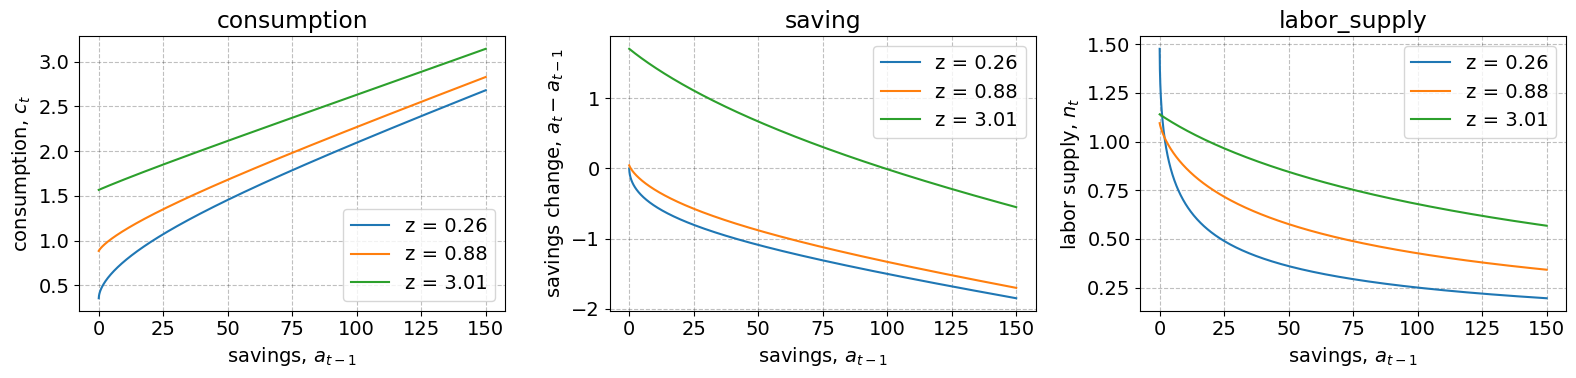

In [7]:
fig = plt.figure(figsize=(16,4),dpi=100)
a_max = 500

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.c[0,i_z,:][I],label=f'z = {z:.2f}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')
ax.legend(frameon=True)

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.a[0,i_z,:][I]-par.a_grid[I],label=f'z = {z:.2f}')


ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
ax.legend(frameon=True)

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z, z in enumerate(par.z_grid):
    if i_z % 3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.ell[0,i_z,:][I],label=f'z = {z:.2f}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')
ax.legend(frameon=True)
fig.tight_layout()

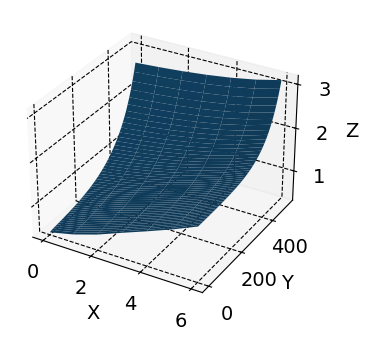

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,4),dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Generate grid for the two dimensions you are plotting on the x and y axes.
Y, X = np.meshgrid(range(ss.c.shape[2]), range(ss.c.shape[1]))  # adjust indices as needed

for i in range(ss.c.shape[0]):  # loop over the first dimension of your data
    # plot a surface for each slice of your data along the first dimension
    ax.plot_surface(X, Y, ss.c[i,:,:])
    
# Add labels to the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()